In [17]:
import pylhe
import numpy as np
import awkward as ak
import hist

In [18]:
pylhe.register_awkward()
arr = pylhe.to_akward(pylhe.readLHEWithAttributes('unweighted_events.lhe'))
arr

<EventArray [{eventinfo: {nparticles: 4, ... ] type='10000 * Event["eventinfo": ...'>

In [16]:
h = hist.Hist.new.Reg(100,50,150).Int64()
h.fill(
    (arr.particles.vector[:,-1] + arr.particles.vector[:,-2]).mass
)

Hist(Regular(100, 50, 150, label='Axis 0'), storage=Int64()) # Sum: 7860.0 (10000.0 with flow)

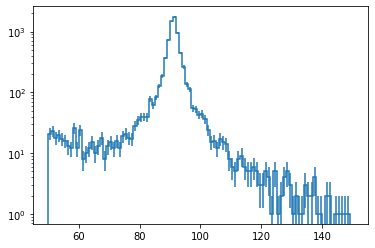

In [26]:
artists = h.plot1d()
artists[0].stairs.axes.set_yscale('log')